In [1]:
import numpy as np

from getdist import plots, MCSamples

from scipy.optimize import minimize
from scipy.integrate import solve_ivp


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator
%matplotlib inline
font_files = 'Times New Roman.ttf'
font_manager.fontManager.addfont(font_files)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['font.family'] = ['Times New Roman']

from utils import kappa, ode_system, fs8, chi_squared

In [2]:
om_fdl = [0.3, 0.3, 0.266, 0.3, 0.31, 0.3, 0.27, 0.27, 0.25, 0.25,
          0.274,0.307115, 0.27, 0.27, 0.27, 0.3, 0.3, 0.27]

file_path = 'data/Cij_WiggleZ.txt'
Wiggle = np.loadtxt(file_path)

data_file_path = 'data/data_growth_2016_main.txt'
data = np.loadtxt(data_file_path)

In [3]:
z_data = data[:,0]
y_data = data[:,1]
sigma = data[:,2]

cov = np.eye(len(z_data))

# Replace the diagonal of the identity matrix with the array elements
np.fill_diagonal(cov, sigma**2)
cov[12:15, 12:15] = Wiggle
cov_inv = np.linalg.inv(cov)

a_data = 1/(z_data+1)

a_data = a_data[::-1]
y_data = y_data[::-1]
sigma  = sigma[::-1]
om_fdl = om_fdl[::-1]

In [4]:
ai,af,da = 1e-3,1, 1e-4
yi,xi = ai,1
N = int(round((af-ai)/da))
a_values = np.linspace(ai, af, N)
indices = np.searchsorted(a_values, a_data, side="left")
a_values[indices] = a_data
initial_conditions = [yi, xi]

In [5]:
samples_L = np.load('samples_LCDM.npz')['arr_0']
samples_plt_L = MCSamples(samples=samples_L,names=['Om','sig'], labels=[r'\Omega_m', r'\sigma_8'])

Removed no burn in


In [6]:
samples_G = np.load('samples_GCDM.npz')['arr_0']
samples_plt_G = MCSamples(samples=samples_G,names=['b','sig'], labels=[r'\Omega_m', r'\sigma_8'])
p = samples_plt_G.getParams()
samples_plt_G.addDerived(1/kappa(1, 0, p.b), name='Om', label=r'\Omega_m')

Removed no burn in


\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\Omega_m       $} & $0.22^{+0.12}_{-0.11}      $\\

{\boldmath$\sigma_8       $} & $0.89^{+0.24}_{-0.20}      $\\
\hline
\end{tabular}
chi^2: 12.293534312333401


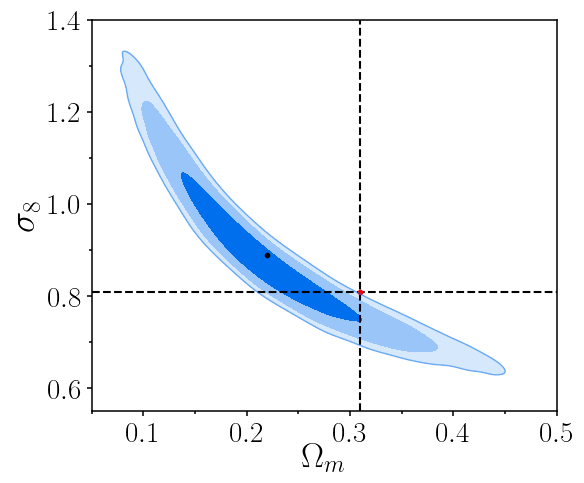

In [7]:
Om_planck,    sig_planck = 0.31,  0.81
Om_lcdm,      sig_lcdm   = samples_plt_L.mean(samples_plt_L.samples) 

g = plots.get_single_plotter(width_inch=6, ratio=1/1.18, rc_sizes=20)
g.settings.num_plot_contours = 3

plt.axvline(x=Om_planck, color='k', linestyle='--')
plt.axhline(y=sig_planck, color='k', linestyle='--')
plt.plot([Om_planck], [sig_planck], '.', color= 'red')
plt.plot([Om_lcdm], [sig_lcdm], '.', color= 'black')

g.plot_2d([samples_plt_L], ('Om','sig'),filled=True)

ax = g.subplots[0][0]
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(mticker.MultipleLocator(0.05))

plt.xticks(np.arange(0.1, 0.51, step=0.1))
plt.xlim(0.05, 0.5)
plt.yticks(np.arange(0.6, 1.41, step=0.2))
plt.ylim(0.55, 1.4)
ax.tick_params(axis='both', which='both', width=1.1, labelsize=21, labelcolor='black')

ax.set_xlabel(r'$\Omega_m$', fontsize=25, fontweight='bold')
ax.set_ylabel(r'$\sigma_8$', fontsize=26, fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(1.1)

g.export('figures/LCDM_confidence.eps')
print(samples_plt_L.getTable().tableTex())

final_loss = chi_squared([Om_lcdm,sig_lcdm], fs8, a_values, a_data, y_data, cov_inv, om_fdl,'LCDM')
print("chi^2:", final_loss)

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\Omega_m       $} & $0.241^{+0.089}_{-0.097}   $\\

{\boldmath$\sigma_8       $} & $0.87^{+0.20}_{-0.19}      $\\

$\Omega_m                  $ & $0.284^{+0.092}_{-0.073}   $\\
\hline
\end{tabular}
chi^2: 14.24372495280035


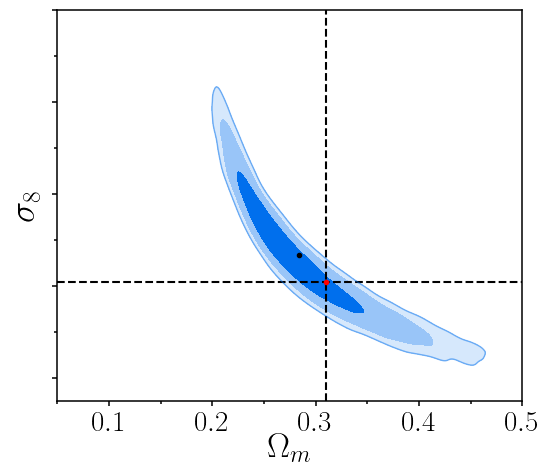

In [8]:
b_gcdm,       sig_gcdm,     Om_gcdm  = samples_plt_G.mean(samples_plt_G.samples)

g = plots.get_single_plotter(width_inch=6, ratio=1/1.18, rc_sizes=20)
g.settings.num_plot_contours = 3

plt.axvline(x=Om_planck, color='k', linestyle='--')
plt.axhline(y=sig_planck, color='k', linestyle='--')

g.plot_2d([samples_plt_G], ('Om','sig'),filled=True)

ax = g.subplots[0][0]

plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(mticker.MultipleLocator(0.05))

plt.xticks(np.arange(0.1, 0.51, step=0.1))
plt.xlim(0.05, 0.5)
plt.yticks(np.arange(0.6, 1.41, step=0.2))
plt.ylim(0.55, 1.4)
plt.gca().set_yticklabels([])
ax.tick_params(axis='both', which='both', width=1.1, labelsize=21, labelcolor='black')

ax.set_xlabel(r'$\Omega_m$', fontsize=25, fontweight='bold')
ax.set_ylabel(r'$\sigma_8$',fontsize=26, fontweight='bold')

plt.plot([Om_planck], [sig_planck], '.', color= 'red')
plt.plot([Om_gcdm], [sig_gcdm], '.', color= 'black')

for spine in ax.spines.values():
    spine.set_linewidth(1.1)

g.export('figures/GCDM_confidence2.eps')

print(samples_plt_G.getTable().tableTex())

final_loss = chi_squared([b_gcdm,sig_gcdm], fs8, a_values, a_data, y_data, cov_inv, om_fdl,'GCDM')
print("chi^2:", final_loss)

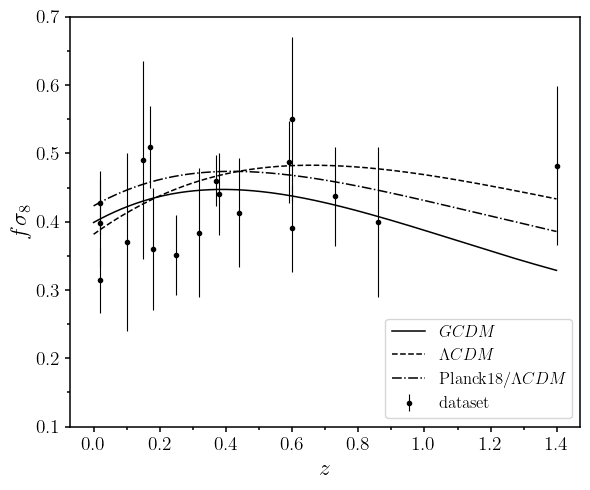

In [40]:
k = 300
sol1 = solve_ivp(ode_system, [ai, af], initial_conditions, args=(0, b_gcdm, k), t_eval=a_values)
sol2 = solve_ivp(ode_system, [ai, af], initial_conditions, args=(1/Om_planck -1, 0, 0), t_eval=a_values)
sol3 = solve_ivp(ode_system, [ai, af], initial_conditions, args=(1/Om_lcdm - 1, 0, 0), t_eval=a_values)

G_delta, G_delta_prime = sol1.y
PL_delta, PL_delta_prime = sol2.y
L_delta, L_delta_prime = sol3.y


G_pred        =  fs8(G_delta,  sig_gcdm,  G_delta_prime, a_values)
PL_pred       =  fs8(PL_delta, sig_planck, PL_delta_prime, a_values)
L_pred        =  fs8(L_delta,  sig_lcdm, L_delta_prime, a_values)


z_data_plt  = data[:,0]
y_data_plt  = data[:,1]
sigma_plt   = data[:,2]

z = 1/a_values - 1

z14indx = np.where(z[::-1] == 1.4)[0][0]

plt.figure(figsize=(6,5))
plt.errorbar(z_data_plt, y_data_plt, sigma_plt, fmt='.', color='k',     label = "dataset", linewidth=0.8)
plt.plot(z[::-1][:z14indx], G_pred[::-1][:z14indx],    'k',             label = "$GCDM$", linewidth=1.1)
plt.plot(z[::-1][:z14indx], L_pred[::-1][:z14indx],    'k--',           label = r"$\Lambda CDM$", linewidth=1.1)
plt.plot(z[::-1][:z14indx], PL_pred[::-1][:z14indx],   'k-.',           label = r"Planck18/$\Lambda CDM$", linewidth=1.1)
plt.legend(fontsize=12,loc='lower right')
plt.xlabel(r'$z$',size = 17, fontweight='bold')
plt.ylabel(r'$f\sigma_8$',size = 17, fontweight='bold')

plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(0.05))
plt.gca().xaxis.set_minor_locator(mticker.MultipleLocator(0.1))

plt.gca().tick_params(axis='both', which='both', width=1.1, labelsize=14, labelcolor='black')

for spine in plt.gca().spines.values():
    spine.set_linewidth(1.1)

plt.ylim(0.1,0.7)
plt.tight_layout()

plt.savefig('figures/fsigma8.eps')

LCDM
\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\Omega_m       $} & $0.22^{+0.12}_{-0.11}      $\\

{\boldmath$\sigma_8       $} & $0.89^{+0.24}_{-0.20}      $\\
\hline
\end{tabular}
LCDM chi^2: 12.293534312333401
 
GCDM
\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\Omega_m       $} & $0.241^{+0.089}_{-0.097}   $\\

{\boldmath$\sigma_8       $} & $0.87^{+0.20}_{-0.19}      $\\

$\Omega_m                  $ & $0.284^{+0.092}_{-0.073}   $\\
\hline
\end{tabular}
GCDM chi^2: 14.24372495280035


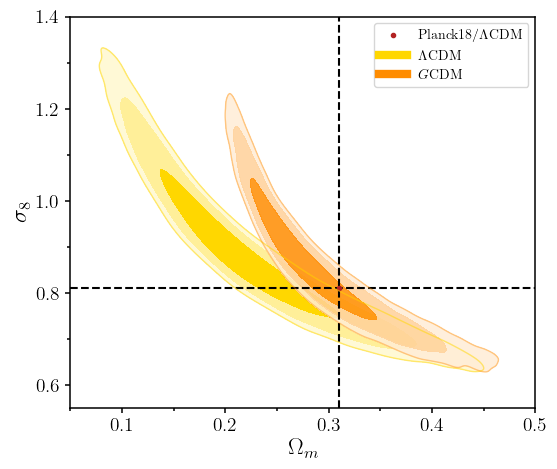

In [100]:
Om_planck,    sig_planck = 0.31,  0.81
Om_lcdm,      sig_lcdm   = samples_plt_L.mean(samples_plt_L.samples) 

b_gcdm,       sig_gcdm,     Om_gcdm  = samples_plt_G.mean(samples_plt_G.samples)

g = plots.get_single_plotter(width_inch=6, ratio=1/1.18, rc_sizes=20)
g.settings.num_plot_contours = 3


plt.axvline(x=Om_planck,            color='k', linestyle='--')
plt.axhline(y=sig_planck,           color='k', linestyle='--')
plt.plot([Om_planck], [sig_planck], '.',       color= 'firebrick', label= 'Planck18/$\Lambda$CDM')

# plt.plot([Om_lcdm], [sig_lcdm],     '.',       color= 'darkred')
# plt.plot([Om_gcdm], [sig_gcdm],     '.',       color= 'grey')

g.plot_2d([samples_plt_L, samples_plt_G], ('Om','sig'),filled=True, colors=[ 'gold', 'darkorange'])
# g.add_legend([r"$\Lambda CDM$", '$GCDM$'], legend_loc='upper right')

handles, labels = plt.gca().get_legend_handles_labels()  # Get existing legends for the points

# Add manual legends for the contours
contour_handles = [
    plt.Line2D([0], [0], color='gold', lw=6, label=r'$\Lambda$CDM'),
    plt.Line2D([0], [0], color='darkorange', lw=6, label=r'$G$CDM')
]

handles.extend(contour_handles) 
plt.legend(handles=handles, loc='upper right')

ax = g.subplots[0][0]
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(mticker.MultipleLocator(0.05))

plt.xticks(np.arange(0.1, 0.51, step=0.1))
plt.xlim(0.05, 0.5)
plt.yticks(np.arange(0.6, 1.41, step=0.2))
plt.ylim(0.55, 1.4)
ax.tick_params(axis='both', which='both', width=1.1, labelsize=14, labelcolor='black')

ax.set_xlabel(r'$\Omega_m$', fontsize=17, fontweight='bold')
ax.set_ylabel(r'$\sigma_8$', fontsize=17, fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(1.1)

g.export('figures/GLCDM_confidence.eps')


print("LCDM")
print(samples_plt_L.getTable().tableTex())

final_loss = chi_squared([Om_lcdm,sig_lcdm], fs8, a_values, a_data, y_data, cov_inv, om_fdl,'LCDM')
print("LCDM chi^2:", final_loss)
print(' ')
print("GCDM")
print(samples_plt_G.getTable().tableTex())

final_loss = chi_squared([b_gcdm,sig_gcdm], fs8, a_values, a_data, y_data, cov_inv, om_fdl,'GCDM')
print("GCDM chi^2:", final_loss)